**DDos Attacks Classification**

**Table of Contents**:<br>
1- Importing libraries<br>
2- Data Pre-processing <br>
3- Data Exploring<br>
4- Data Splitting<br>
5- Model training (Random Forest, Logistic regression, Neural Network)<br>
6- Model Evaluation<br>
7- Model Comparison <br>

**Importing libraries**

In [8]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

**Data Pre-Processing**

In [10]:
dataset = pd.read_csv('../Project/dataset.csv')
dataset.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [13]:
#Unique values in the Label target column
dataset[' Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

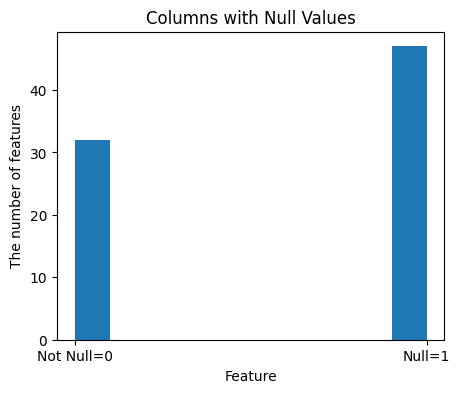

In [12]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 5, 4))
plt.hist( dataset.isna().sum())
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')
plt.show()

In [14]:
#remove null values from the dataset
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66236 entries, 0 to 66235
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             66236 non-null  int64  
 1    Flow Duration                66236 non-null  int64  
 2    Total Fwd Packets            66236 non-null  int64  
 3    Total Backward Packets       66236 non-null  int64  
 4   Total Length of Fwd Packets   66236 non-null  int64  
 5    Total Length of Bwd Packets  66236 non-null  int64  
 6    Fwd Packet Length Max        66236 non-null  int64  
 7    Fwd Packet Length Min        66236 non-null  int64  
 8    Fwd Packet Length Mean       66236 non-null  float64
 9    Fwd Packet Length Std        66236 non-null  float64
 10  Bwd Packet Length Max         66236 non-null  int64  
 11   Bwd Packet Length Min        66236 non-null  int64  
 12   Bwd Packet Length Mean       66236 non-null  float64
 13   Bwd P

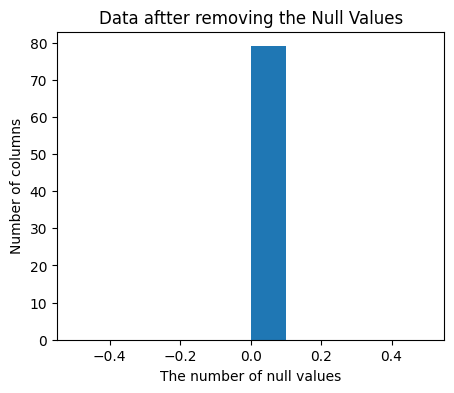

In [15]:
#Checking the null values in the dataset again.
plt.figure(1,figsize=( 5,4))
plt.hist( dataset.isna().sum())
plt.title('Data aftter removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')
plt.show()

In [20]:
# Remove the spaces before the column names
dataset.columns = dataset.columns.str.strip()

In [21]:
# Convert the labels in the DataFrame to numerical values
dataset['Label'] = dataset['Label'].map({'BENIGN': 0, 'DDoS': 1})

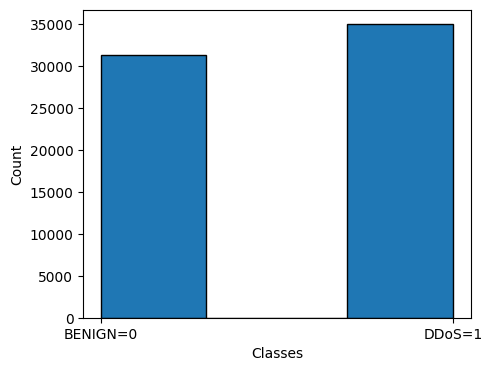

In [24]:
plt.figure(1,figsize=( 5,4)) 
plt.hist(dataset['Label'], bins=[0, 0.3,0.7,1], edgecolor='black') 
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

**Data Exploration**

In [26]:
#statistical info
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Destination Port,66236.000,6454.702,16711.002,0.000,80.000,80.000,80.000,61538.000
Flow Duration,66236.000,13887573.095,28158593.986,0.000,49954.500,994943.000,7640073.250,119998337.000
Total Fwd Packets,66236.000,5.180,16.874,1.000,2.000,3.000,5.000,1681.000
Total Backward Packets,66236.000,5.119,23.797,0.000,1.000,4.000,5.000,2942.000
Total Length of Fwd Packets,66236.000,695.633,3230.070,0.000,26.000,30.000,64.000,120783.000
...,...,...,...,...,...,...,...,...
Idle Mean,66236.000,8153964.124,18046167.645,0.000,0.000,0.000,7410305.500,120000000.000
Idle Std,66236.000,2602818.759,9841558.660,0.000,0.000,0.000,0.000,65300000.000
Idle Max,66236.000,9997795.078,21876453.022,0.000,0.000,0.000,7415575.250,120000000.000
Idle Min,66236.000,6297389.399,16427011.083,0.000,0.000,0.000,6526831.500,120000000.000


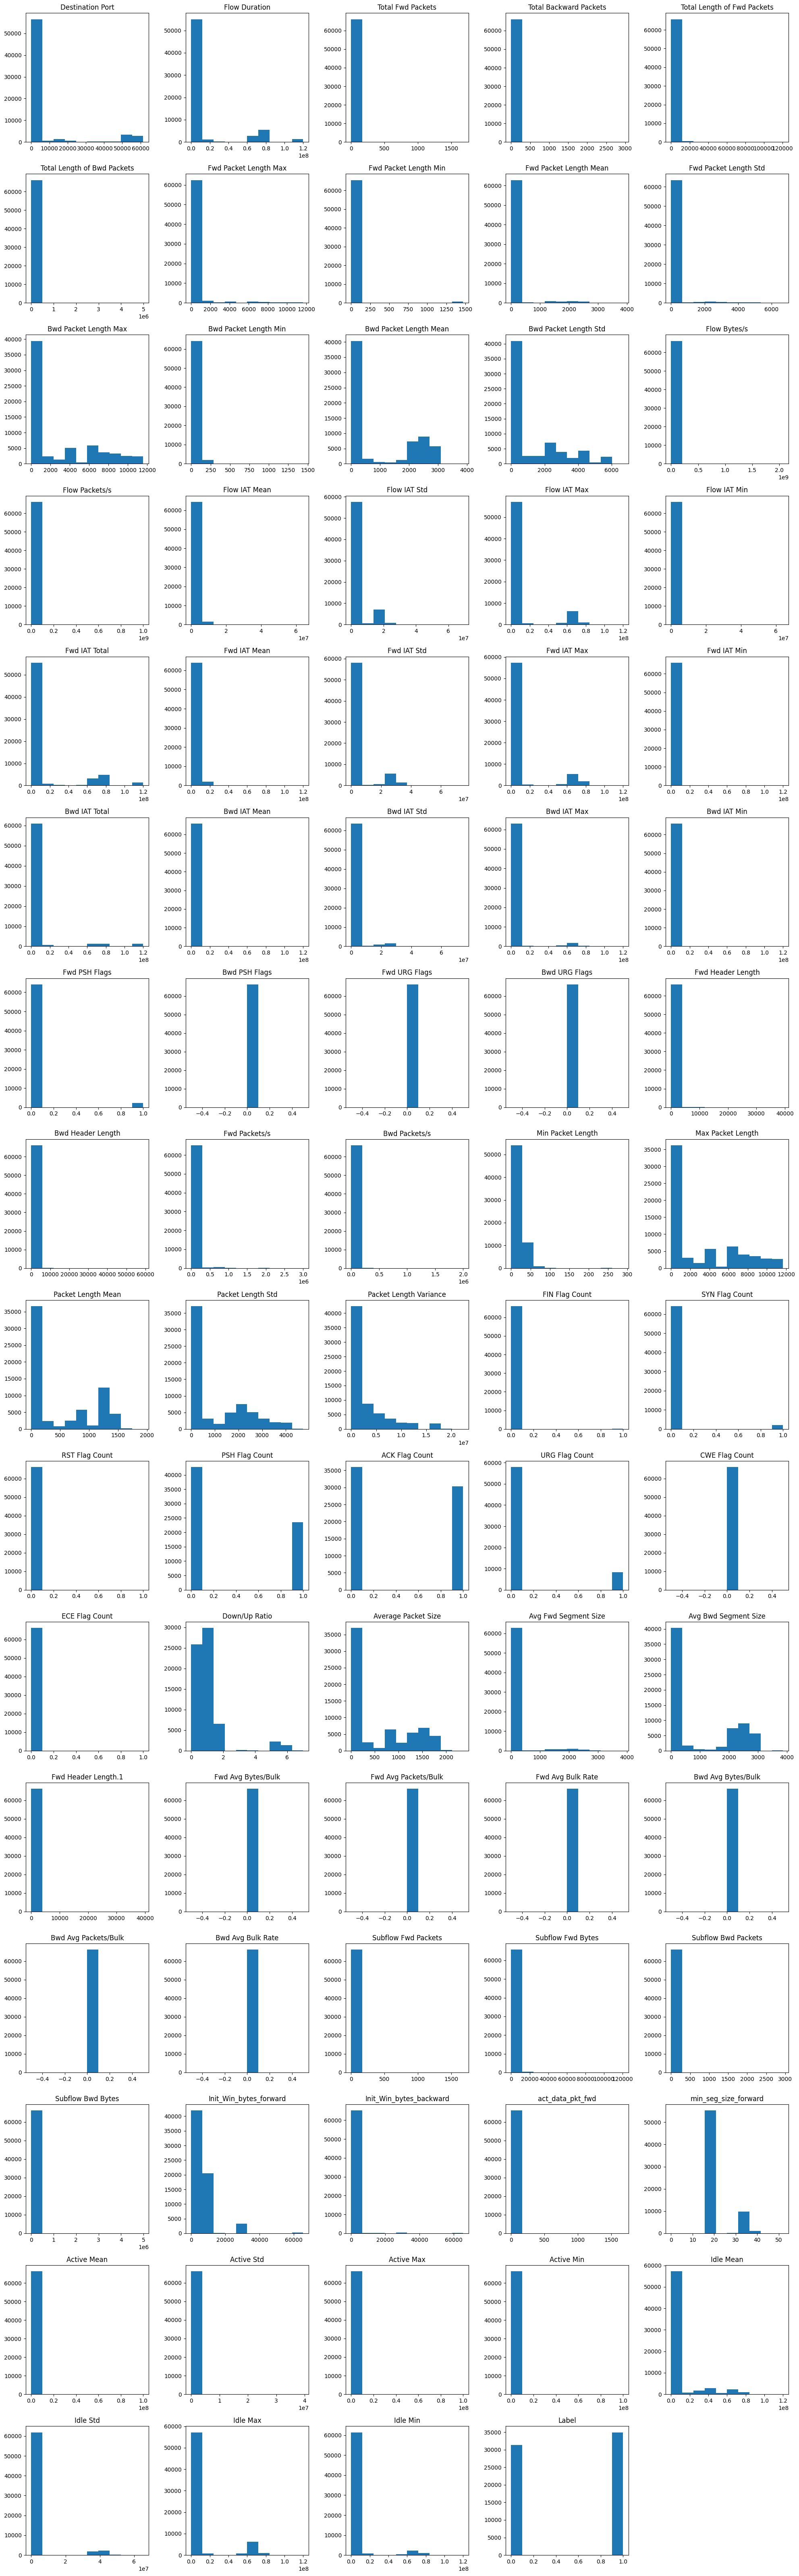

In [ ]:
# Create a histogram plot for each feature
import math
num_cols = len(dataset.columns)
cols_per_row = 5
rows = math.ceil(num_cols / cols_per_row)
fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 4 * rows))
axes = axes.flatten()
for i, col in enumerate(dataset.columns):
    axes[i].hist(dataset[col])
    axes[i].set_title(col)
# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()


**Split the Data**

In [28]:
# Split data into features and target variable
X = dataset.drop('Label', axis=1)
y = dataset['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (46365, 78)
The test dataset size =  (19871, 78)


**Train the Model**


**Random Forest Model**

In [30]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

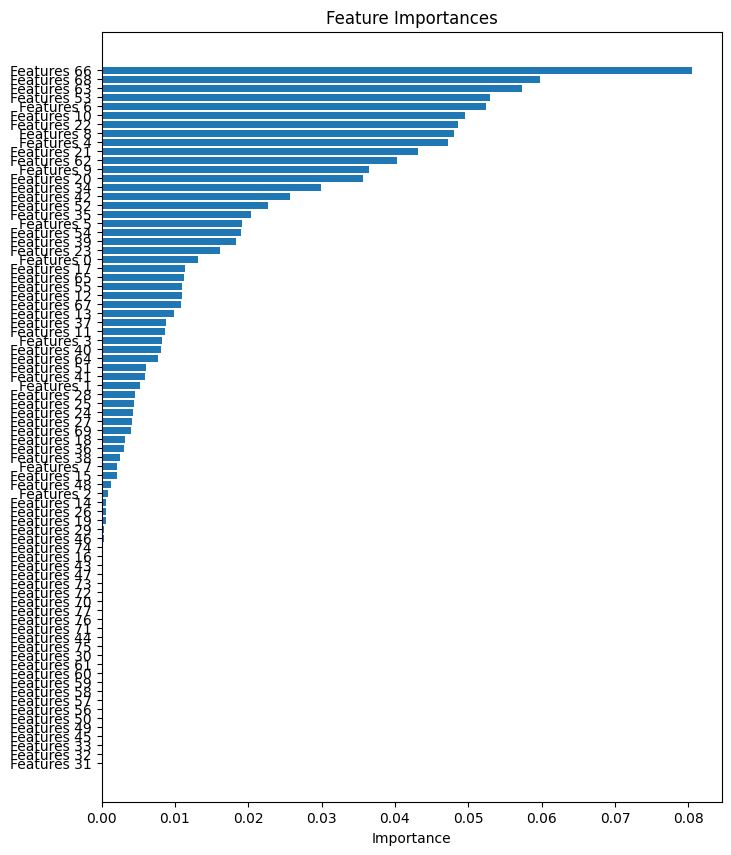

In [32]:
# Getting feature importances from the trained model
importances = rf_model.feature_importances_
# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"Features {i}" for i in indices]  # Replace with your column names
# Plotting feature importances horizontally
plt.figure(figsize=(8, 10))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

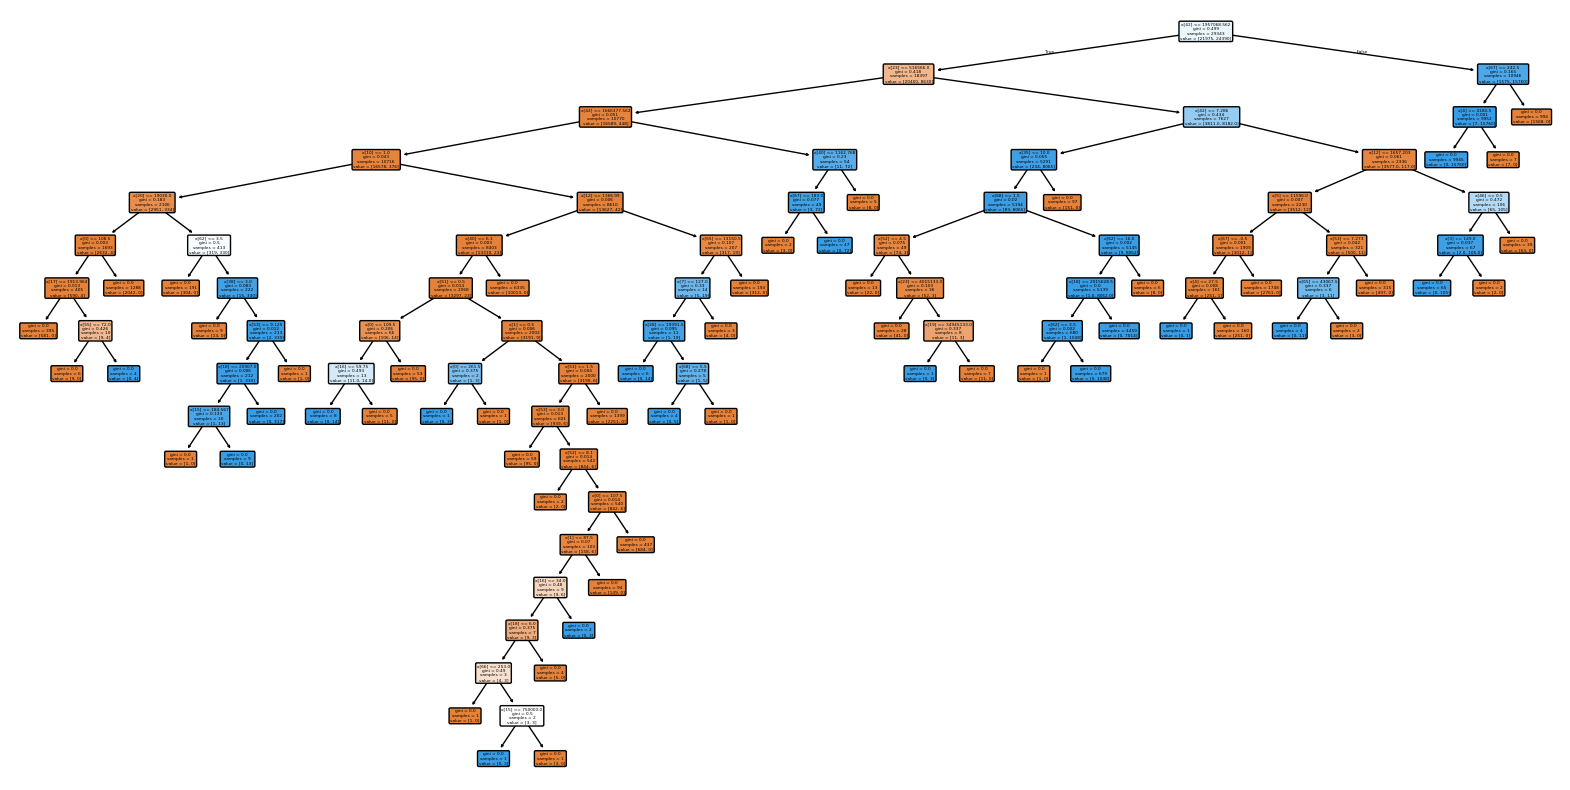

In [33]:
from sklearn.tree import plot_tree
estimator = rf_model.estimators_[0] 
plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

In [34]:
# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [35]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 0.9995
F1 Score: 0.9995
Precision: 1.0000
Recall: 0.9990


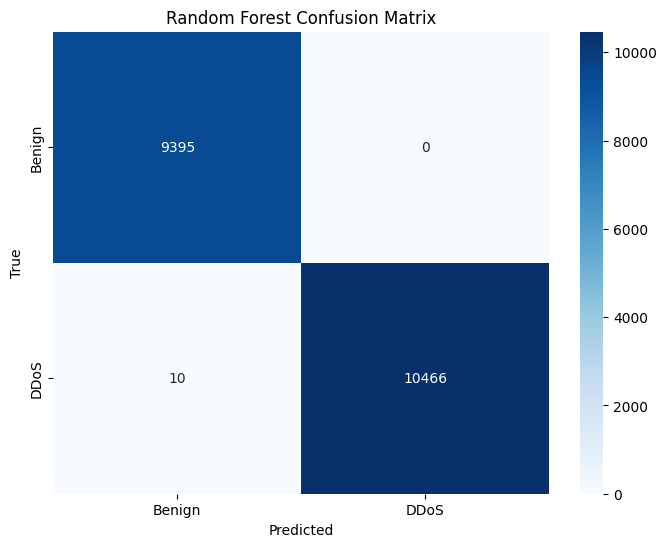

In [36]:

# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

**Model Evaluation**

In [37]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

c:\Users\win10\Desktop\Project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9440
F1 Score: 0.9493
Precision: 0.9089
Recall: 0.9934


**Neural Network**

In [40]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

c:\Users\win10\Desktop\Project\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9827
F1 Score: 0.9837
Precision: 0.9760
Recall: 0.9915


**Model Evaluation**

In [42]:
# Random Forest
rf_proba = rf_model.predict_proba(X_test)
# Logistic Regression
lr_proba = lr_model.predict_proba(X_test)
# Neural Network
nn_proba = nn_model.predict_proba(X_test)

In [43]:
# Combine predictions for ROC curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)

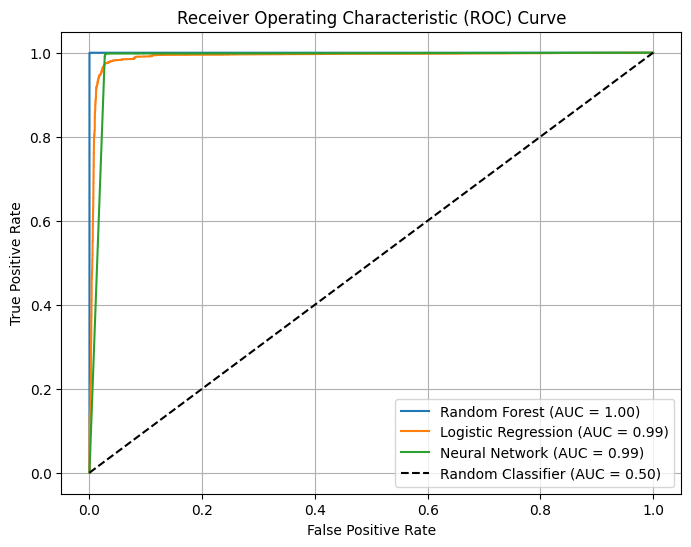

In [44]:
# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()